In [3]:
from sklearn import datasets
boston_house_prices = datasets.load_boston()

In [4]:
# 로드한 boston 전체 데이터에 key 값을 출력
print(boston_house_prices.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [5]:
# boston 전체 데이터 중 data에 대한 전체 행, 열 길이를 출력
print(boston_house_prices.data.shape)

(506, 13)


In [6]:
# boston 데이터에 컬럼 이름을 출력 
print(boston_house_prices.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(boston_house_prices.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
import pandas as pd

In [9]:
data=pd.DataFrame(boston_house_prices.data)

In [10]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [11]:
data.columns=boston_house_prices.feature_names

In [12]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [13]:
data['Price']=boston_house_prices.target
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


<AxesSubplot:xlabel='RM', ylabel='Price'>

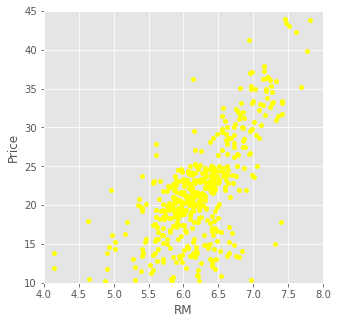

In [19]:
import matplotlib.pylab as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

data.plot(kind='scatter', x ="RM", y="Price", figsize=(5, 5), color='yellow', xlim=(4,8), ylim=(10,45))


In [21]:
from sklearn import linear_model

In [22]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(data['RM']), y=data['Price'])
prediction = linear_regression.predict(X=pd.DataFrame(data['RM']))
print('a value: ', linear_regression.intercept_)
print('b value: ',linear_regression.coef_)


a value:  -34.670620776438554
b value:  [9.10210898]


In [23]:
residuals = data['Price'] - prediction
residuals.describe()

count    5.060000e+02
mean    -7.863714e-16
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: Price, dtype: float64

In [24]:
SSE = (residuals**2).sum()
SST = ((data['Price']-data['Price'].mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared: ', R_squared)


R_squared:  0.48352545599133423


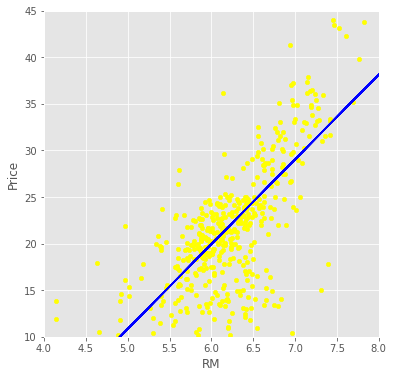

In [30]:
data.plot(kind='scatter', x='RM', y='Price', figsize=(6,6), color='yellow',
         xlim=(4,8), ylim=(10, 45))

plt.plot(data['RM'], prediction, color='b')


In [31]:
from sklearn.metrics import mean_squared_error

In [33]:
print('score: ', linear_regression.score(X=pd.DataFrame(data['RM']), y= data['Price']))
print('Mean Squared Error: ', mean_squared_error(prediction, data['Price']))
print('RMSE: ', mean_squared_error(prediction, data['Price'])**.5)


score:  0.48352545599133423
Mean Squared Error:  43.60055177116956
RMSE:  6.603071389222561
